In [1]:
# using Revise
# path_to_package = "/home/manuel/.julia/dev/PauliPropagation"
# insert!(LOAD_PATH, 1, path_to_package);

using Pkg
Pkg.add(url="https://github.com/MSRudolph/PauliPropagation.jl.git", rev="dev")

    Updating git-repo `https://github.com/MSRudolph/PauliPropagation.jl.git`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.11/Project.toml`
  No Changes to `~/.julia/environments/v1.11/Manifest.toml`


In [2]:
using PauliPropagation

In [3]:
θ = 0.1im

0.0 + 0.1im

In [4]:
# the computational basis matrices
rzmat = tomatrix(PauliRotation(:Z, 1), θ)
rxmat = tomatrix(PauliRotation(:X, 1), θ)
rzzmat = tomatrix(PauliRotation([:Z, :Z], [1, 2]), θ)

# the Pauli basis matrices
rzptm = calculateptm(rzmat; heisenberg=false)
rxptm = calculateptm(rxmat; heisenberg=false)
rzzptm = calculateptm(rzzmat; heisenberg=false)

# the Pauli basis transfermaps
rzmap = totransfermap(rzptm)
rxmap = totransfermap(rxptm)
rzzmap = totransfermap(rzzptm);

In [5]:
rzmap

4-element Vector{Vector{Tuple{UInt8, Float64}}}:
 [(0x00, 1.0050041680558035), (0x03, 0.10016675001984404)]
 [(0x01, 1.0)]
 [(0x02, 1.0)]
 [(0x00, 0.10016675001984404), (0x03, 1.0050041680558035)]

In [50]:
nq = 8
topology = bricklayertopology(nq)

# the circuit
circuit = Gate[]
append!(circuit, TransferMapGate(rxmap, ii) for ii in 1:nq);
# append!(circuit, TransferMapGate([ii], rzmap) for ii in 1:nq);
# append!(circuit, TransferMapGate(collect(pair), rzzmap) for pair in topology);

In [51]:
pstr = PauliString(nq, :I, 1)
psum = PauliSum(pstr)

PauliSum(nqubits: 8, 1 Pauli term: 
 1.0 * IIIIIIII
)

In [8]:
# Manuel version

# nls = 1
# overlaps = Float64[overlapwithplus(psum) / sqrt(2^nq)]
# for _ in 1:nls
#     psum = propagate!(circuit, psum)
#     @show psum
#     @show norm(psum)
#     mult!(psum, 1/norm(psum))
#     push!(overlaps, overlapwithplus(psum) / sqrt(2^nq))
# end

In [68]:
# Zoe Version

nls = 100

pstr = PauliString(nq, :I, 1)
psum = PauliSum(pstr)

overlaps = Float64[overlapwithplus(psum)]

for _ in 1:nls
    psum = propagate!(circuit, psum)
    psum
    psumnew = mult!(psum, 1/((2^nq)*getcoeff(psum, :I, 1)))
    push!(overlaps, overlapwithplus(psumnew))
end

In [69]:
using Plots

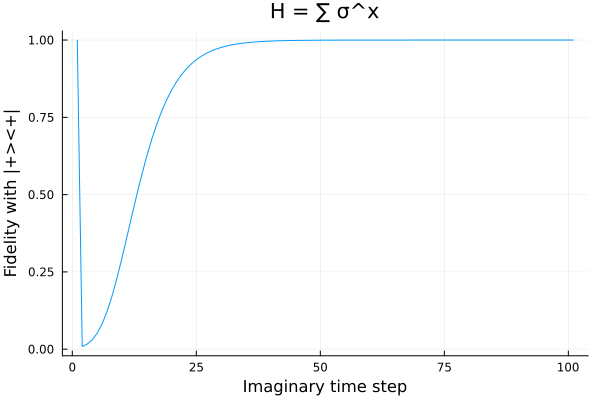

In [70]:
plot(overlaps, ylabel="Fidelity with |+><+|", xlabel="Imaginary time step", label="", title="H = ∑ σ^x")